/var/folders/nd/mjkzg7zx4n9dbwmv3w4yhrwr0000gn/T/ipykernel_74397/2865696039.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_idx = trial[0] - 200
/var/folders/nd/mjkzg7zx4n9dbwmv3w4yhrwr0000gn/T/ipykernel_74397/2865696039.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  end_idx = trial[0] + 1000


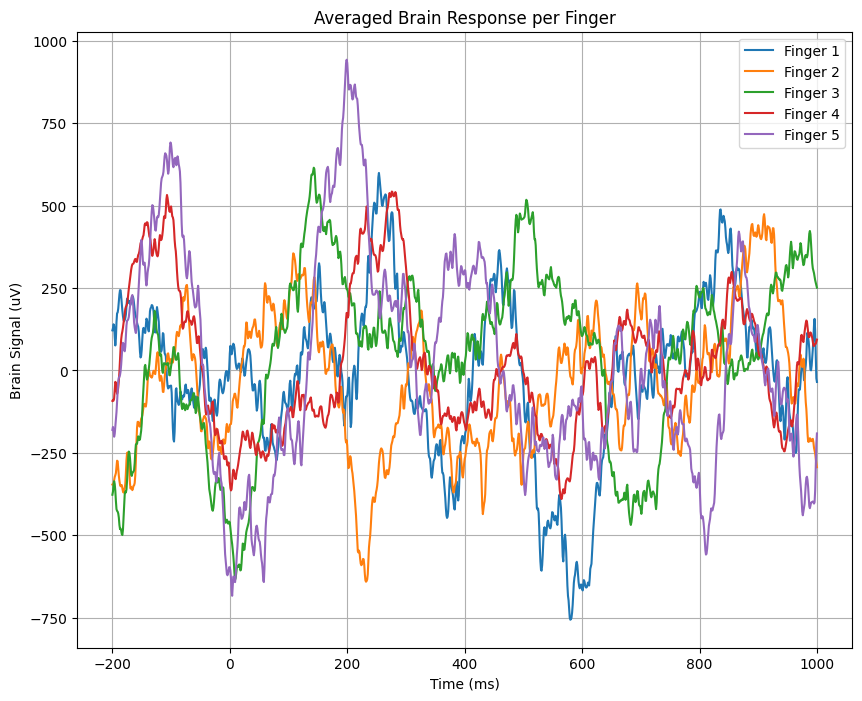

Example of ERP Mean Matrix:
              Time 0      Time 1      Time 2      Time 3      Time 4  \
Finger 1  121.585938  128.078125  140.179688  135.187500  101.851562   
Finger 2 -346.252101 -345.361345 -342.798319 -333.630252 -323.084034   
Finger 3 -377.333333 -367.991667 -346.641667 -336.325000 -344.958333   
Finger 4  -92.447368  -89.542105  -91.615789  -84.073684  -58.947368   
Finger 5 -180.351351 -171.594595 -185.486486 -201.135135 -192.472973   

              Time 5      Time 6      Time 7      Time 8      Time 9  ...  \
Finger 1   75.820312   97.250000  147.015625  173.390625  176.007812  ...   
Finger 2 -317.974790 -311.294118 -293.008403 -273.924370 -275.781513  ...   
Finger 3 -365.325000 -396.366667 -421.033333 -426.291667 -428.466667  ...   
Finger 4  -34.610526  -37.057895  -58.847368  -71.147368  -65.352632  ...   
Finger 5 -170.932432 -151.108108 -126.689189  -96.783784  -61.797297  ...   

           Time 1191   Time 1192   Time 1193   Time 1194   Time 1195  \
Fing

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def calc_mean_erp(trial_points_file, ecog_data_file):
    # Load data
    trial_points = pd.read_csv(trial_points_file)
    ecog_data = pd.read_csv(ecog_data_file, header=None)

    # Ensure trial_points data is of type int
    trial_points = trial_points.astype(int)

    # Initialize variables
    num_fingers = 5
    signal_length = 1201  # 200 ms before, 1 ms at start, 1000 ms after
    fingers_erp_mean = np.zeros((num_fingers, signal_length))

    # Process each finger
    for finger in range(1, num_fingers + 1):
        # Filter trial points for the current finger
        finger_trials = trial_points[trial_points.iloc[:, 2] == finger]

        # Initialize list to collect signals for the current finger
        finger_signals = []

        for _, trial in finger_trials.iterrows():
            start_idx = trial[0] - 200
            end_idx = trial[0] + 1000

            # Extract signal if within bounds
            if start_idx >= 0 and end_idx < len(ecog_data):
                signal = ecog_data.iloc[start_idx:end_idx + 1, 0].values
                finger_signals.append(signal)

        # Calculate mean ERP for the current finger
        if finger_signals:
            fingers_erp_mean[finger - 1] = np.mean(finger_signals, axis=0)

    # Plot the averaged brain response for each finger
    time_axis = np.linspace(-200, 1000, signal_length)  # Time in ms
    plt.figure(figsize=(10, 8))
    for finger in range(num_fingers):
        plt.plot(time_axis, fingers_erp_mean[finger], label=f'Finger {finger + 1}')

    plt.title('Averaged Brain Response per Finger')
    plt.xlabel('Time (ms)')
    plt.ylabel('Brain Signal (uV)')
    plt.legend()
    plt.grid()
    plt.show()

    # Display the resulting matrix as an example
    fingers_erp_mean_df = pd.DataFrame(fingers_erp_mean, 
                                       index=[f'Finger {i+1}' for i in range(fingers_erp_mean.shape[0])],
                                       columns=[f'Time {i}' for i in range(fingers_erp_mean.shape[1])])
    print("Example of ERP Mean Matrix:")
    print(fingers_erp_mean_df.head())

    return fingers_erp_mean

# Example usage
trial_points_path = '/Users/KlillJoffe/Library/CloudStorage/OneDrive-Personal/בר אילן/קורסים/תכנות מתקדם פייתון/miniproject2/events_file_ordered.csv'
ecog_data_path = '/Users/KlillJoffe/Library/CloudStorage/OneDrive-Personal/בר אילן/קורסים/תכנות מתקדם פייתון/miniproject2/brain_data_channel_one.csv'

fingers_erp_mean = calc_mean_erp(trial_points_path, ecog_data_path)
